# <font color = 'color'>모두의 딥러닝: 17장_순환신경망(RNN) 이용(p.234)</font>

# <font color = 'blue'>문제 정의</font>

### 로이터 뉴스 데이터셋(Reuters News Dataset)
* 다중분류(multi-class classification) 문제
* 로이터 숏뉴스의 텍스트(단어) 구성특성에 따라 어떤 주제의 기사인지를 분류예측하는 문제상황
* 총 11,258개 뉴스: 훈련용(8,982개), 테스트용(2,246개)
<img src = './../../images/reuters.png'>

In [1]:
# 웹브라우저 라이브러리 이용 해당 파일위치 확인
# import webbrowser
# webbrowser.open('https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection')

1. 피처(입력/예측/독립)변수
    * 한 편의 뉴스를 구성하고 있는 단어별 인덱스번호를 순서대로 나열한 데이터 
    * 인덱스번호가 낮을 수록(1, 2, 3...) 모든 뉴스를 통틀어 사용빈도가 높은 단어임
    * 각 뉴스별 구성단어 갯수는 천차만별임<pre>
1. 타깃(출력/반응/종속)변수
    * 46개의 뉴스토픽(주제) 범주(0 ~ 45)
<img src = './../../images/reuters_logic.png'>

# <font color = 'blue'>데이터 준비</font>

### 시각화 모듈로딩 및 한글폰트 작업

In [2]:
# 시각화 작업을 위한 모듈 로딩작업
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

In [3]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_name = font_manager.FontProperties(fname="./fonts/malgun.ttf").get_name()
print(font_name)

# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

Malgun Gothic


In [4]:
# 워닝메시지 출력관련 모듈로딩
import warnings

warnings.filterwarnings(action = 'ignore') 
# - 출력되는 경고메시지를 무시하고 숨김

# warnings.filterwarnings(action = 'default')
# - 다시 경고메시지가 나타나도록 함

### 관련 라이브러리 로딩

In [5]:
# 기본 범용라이브러리 로딩
import numpy as np
import pandas as pd

In [6]:
# 데이터셋 모듈에서 로이터 뉴스기사 주제분류용 데이터셋 로딩
from keras.datasets import reuters

Using TensorFlow backend.


### reuters 데이터셋을 4개 객체로 로딩

In [7]:
# reuters에 들어 있는 데이터셋을 X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩함
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = 2000)
# - 원래 reuters데이터셋이 2개 요소를 가진 튜플로 구성된 형식이며,
#   각 요소별로 2개 서브요소를 가진 중첩 튜플 형식이라
#   로딩시 튜플로 받기 위해서 괄호()를 2번 사용함

# - reuters 데이터셋 로딩시 디폴트로 test_split = 0.2가 설정되어 있어서 8:2로 훈련셋:테스트셋이 만들어 짐
# - test_split = 0.3으로 하면 훈련셋:테스트셋 = 7:3이 되는 것임

# - 괄호() 안에 num_words = 1000 옵션을 통해  
#   가장 사용빈도수가 높은 시퀀스(텍스트나 숫자 리스트)의 갯수를 지정해 로딩함

### 훈련 reuters 데이터셋

In [8]:
# 훈련 데이터셋 형식과 규모

print('훈련셋 뉴스 구성단어 인덱스번호(피처) 형식:', type(X_train), '규모:', X_train.shape)
# - 훈련셋 뉴스 구성단어 인덱스번호(피처)는 1차원 배열임
# - 뉴스레코드는 8982개이며, 각 뉴스레코드별 구성단어갯수는 다양함

print('훈련셋 뉴스주제 범주(타겟) 형식:', type(y_train), '규모:', y_train.shape)
# - 훈련셋 뉴스주제 범주(타겟)는 1차원 배열형식임
# - 범주레코드 갯수는  8982개로 구성됨

훈련셋 뉴스 구성단어 인덱스번호(피처) 형식: <class 'numpy.ndarray'> 규모: (8982,)
훈련셋 뉴스주제 범주(타겟) 형식: <class 'numpy.ndarray'> 규모: (8982,)


### 테스트 reuters 데이터셋

In [9]:
# 테스트 데이터셋 형식과 규모

print('테스트셋 뉴스 구성단어 인덱스번호(피처) 형식:', type(X_test), '규모:', X_test.shape)
# - 테스트셋 뉴스 구성단어 인덱스번호(피처)는 1차원 배열임
# - 뉴스레코드는 2246개이며, 각 뉴스레코드별 구성단어갯수는 다양함

print('테스트셋 뉴스주제 범주(타겟) 형식:', type(y_test), '규모:', y_test.shape)
# - 테스트셋 뉴스주제 범주(타겟)는 1차원 배열형식임
# - 범주레코드 갯수는  2246 구성됨

테스트셋 뉴스 구성단어 인덱스번호(피처) 형식: <class 'numpy.ndarray'> 규모: (2246,)
테스트셋 뉴스주제 범주(타겟) 형식: <class 'numpy.ndarray'> 규모: (2246,)


# <font color = 'blue'>데이터 탐색</font>

### 훈련 reuters 데이터셋 조회

#### 훈련 데이터셋 중 뉴스 구성단어 인덱스번호(피처) 조회

In [10]:
# 훈련 데이터셋 중 뉴스 구성단어 인덱스번호(피처) 조회

X_train
# reuters에 들어 있는 데이터셋을 
# X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩한 내용을 조회
# - (X_train, y_train), (X_test, y_test) = reuters.load_data()

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 1037, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 1390, 55, 2, 92, 617, 

In [11]:
# 훈련 데이터셋 중 첫번째 뉴스 내용 조회
print('첫번째 뉴스 길이:', len(X_train[0]))
print()
print(X_train[0])
# - 훈련용 데이터셋 중 첫 번째 뉴스를 구성하고 있는 내용은 
#   구체적인 단어들이 아니라 단어들을 번호로 변환해 놓은 인덱스번호임

첫번째 뉴스 길이: 87

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [12]:
# 훈련 데이터셋 중 두번째 뉴스 내용 조회
print('두번째 뉴스 길이:', len(X_train[1]))
print()
print(X_train[1])
# - 훈련용 데이터셋 중 두 번째 뉴스를 구성하고 있는 내용은 
#   구체적인 단어들이 아니라 단어들을 번호로 변환해 놓은 인덱스번호임

두번째 뉴스 길이: 56

[1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 1037, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]


#### 훈련 데이터셋 중 뉴스주제 범주(타겟) 조회

In [13]:
# 훈련 데이터셋 중 뉴스주제 범주(타겟) 조회

y_train
# reuters에 들어 있는 데이터셋을 
# X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩한 내용을 조회
# - (X_train, y_train), (X_test, y_test) = reuters.load_data()

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [14]:
# 훈련 데이터셋 중 뉴스주제 범주(타겟) 분포파악
y_tr_uq = np.unique(y_train)
print('훈련셋 뉴스주제 범주(타겟) 유형:\n', y_tr_uq)

y_tr_bin = np.bincount(y_train)
print('\n훈련셋 뉴스주제 범주(타겟) 유형별 빈도수:\n', y_tr_bin)

y_tr_por = [round(i / sum(y_tr_bin), 3) for i in y_tr_bin]
print('\n훈련셋 뉴스주제 범주(타겟) 유형별 비율:\n', y_tr_por)

훈련셋 뉴스주제 범주(타겟) 유형:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]

훈련셋 뉴스주제 범주(타겟) 유형별 빈도수:
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
   26   20  444   39   66  549  269  100   15   41   62   92   24   15
   48   19   45   39   32   11   50   10   49   19   19   24   36   30
   13   21   12   18]

훈련셋 뉴스주제 범주(타겟) 유형별 비율:
 [0.006, 0.048, 0.008, 0.352, 0.217, 0.002, 0.005, 0.002, 0.015, 0.011, 0.014, 0.043, 0.005, 0.019, 0.003, 0.002, 0.049, 0.004, 0.007, 0.061, 0.03, 0.011, 0.002, 0.005, 0.007, 0.01, 0.003, 0.002, 0.005, 0.002, 0.005, 0.004, 0.004, 0.001, 0.006, 0.001, 0.005, 0.002, 0.002, 0.003, 0.004, 0.003, 0.001, 0.002, 0.001, 0.002]


In [15]:
# 훈련 데이터셋 중 뉴스주제 범주(타겟) 분포테이블
y_tr_tb = pd.DataFrame({'number': y_tr_uq, 
                        'frequency': y_tr_bin, 
                        'oportion': y_tr_por})
y_tr_tb[0:10]

,number,frequency,oportion
0,0,55,0.006
1,1,432,0.048
2,2,74,0.008
3,3,3159,0.352
4,4,1949,0.217
5,5,17,0.002
6,6,48,0.005
7,7,16,0.002
8,8,139,0.015
9,9,101,0.011


In [16]:
# 어떤 뉴스주제 범주가 많은지 발생빈도(frequency) 순으로 내림차순 정렬
y_tr_tb_sorted = y_tr_tb.sort_values('frequency', ascending = 0).reset_index(drop = True) 
y_tr_tb_sorted[0:10]

,number,frequency,oportion
0,3,3159,0.352
1,4,1949,0.217
2,19,549,0.061
3,16,444,0.049
4,1,432,0.048
5,11,390,0.043
6,20,269,0.030
7,13,172,0.019
8,8,139,0.015
9,10,124,0.014


Text(0, 0.5, '갯수')

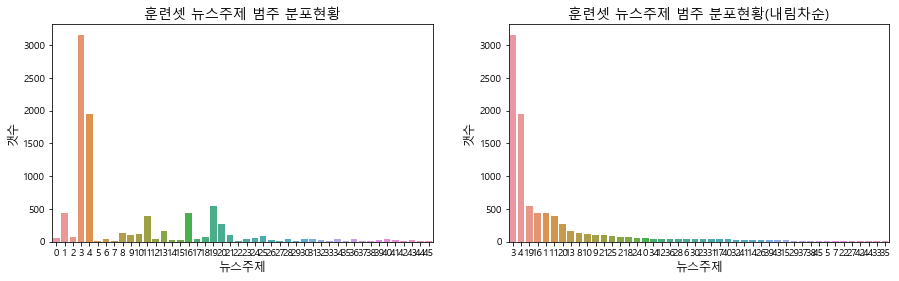

In [17]:
# 훈련 데이터셋 중 뉴스주제 범주(타겟) 분포그래프
fig = plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
ax = sns.barplot(x = 'number', y = 'frequency', data = y_tr_tb) 
ax.set_title('훈련셋 뉴스주제 범주 분포현황', size = 14) 
ax.set_xlabel('뉴스주제', size = 12) 
ax.set_ylabel('갯수', size = 12)

plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'number', y = 'frequency', data = y_tr_tb_sorted, 
                order = y_tr_tb_sorted.number.values) 
ax.set_title('훈련셋 뉴스주제 범주 분포현황(내림차순)', size = 14) 
ax.set_xlabel('뉴스주제', size = 12) 
ax.set_ylabel('갯수', size = 12)

### 테스트 reuters 데이터셋 조회

#### 테스트 데이터셋 중 뉴스 구성단어 인덱스번호(피처) 조회

In [18]:
# 테스트 데이터셋 중 뉴스 구성단어 인덱스번호(피처) 조회

X_test
# reuters에 들어 있는 데이터셋을 
# X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩한 내용을 조회
# - (X_train, y_train), (X_test, y_test) = reuters.load_data()

array([list([1, 4, 1378, 2, 9, 697, 2, 111, 8, 25, 109, 29, 2, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 2, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]),
       list([1, 2, 283, 122, 7, 4, 89, 544, 463, 29, 798, 748, 40, 85, 306, 28, 19, 59, 11, 82, 84, 22, 10, 1315, 19, 12, 11, 82, 52, 29, 283, 1135, 558, 2, 265, 2, 2, 8, 2, 118, 371, 10, 1503, 281, 4, 143, 2, 760, 50, 2, 225, 139, 683, 4, 48, 193, 862, 41, 967, 1999, 30, 1086, 36, 8, 28, 602, 19, 32, 11, 82, 5, 4, 89, 544, 463, 41, 30, 2, 13, 260, 951, 2, 8, 69, 1749, 18, 82, 41

In [19]:
# 테스트 데이터셋 중 첫번째 뉴스 내용 조회
print(X_test[0])
# - 테스트 데이터셋의 첫 번째 뉴스를 구성하고 있는 내용은 
#   구체적인 단어들이 아니라 단어들을 번호로 변환해 놓은 인덱스번호임

[1, 4, 1378, 2, 9, 697, 2, 111, 8, 25, 109, 29, 2, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 2, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


#### 테스트 데이터셋 중 뉴스주제 범주(타겟) 조회

In [20]:
# 테스트 데이터셋 중 뉴스주제 범주(타겟) 조회

y_test
# reuters에 들어 있는 데이터셋을 
# X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩한 내용을 조회
# - (X_train, y_train), (X_test, y_test) = reuters.load_data()

array([ 3, 10,  1, ...,  3,  3, 24], dtype=int64)

In [21]:
# 테스트 데이터셋 중 뉴스주제 범주(타겟) 분포파악
y_tt_uq = np.unique(y_test)
print('테스트셋 뉴스주제 범주(타겟) 유형:\n', y_tt_uq)

y_tt_bin = np.bincount(y_test)
print('\n테스트셋 뉴스주제 범주(타겟) 유형별 빈도수:\n', y_tt_bin)

y_tt_por = [round(i / sum(y_tt_bin), 3) for i in y_tt_bin]
print('\n테스트셋 뉴스주제 범주(타겟) 유형별 비율:\n', y_tt_por)

테스트셋 뉴스주제 범주(타겟) 유형:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]

테스트셋 뉴스주제 범주(타겟) 유형별 빈도수:
 [ 12 105  20 813 474   5  14   3  38  25  30  83  13  37   2   9  99  12
  20 133  70  27   7  12  19  31   8   4  10   4  12  13  10   5   7   6
  11   2   3   5  10   8   3   6   5   1]

테스트셋 뉴스주제 범주(타겟) 유형별 비율:
 [0.005, 0.047, 0.009, 0.362, 0.211, 0.002, 0.006, 0.001, 0.017, 0.011, 0.013, 0.037, 0.006, 0.016, 0.001, 0.004, 0.044, 0.005, 0.009, 0.059, 0.031, 0.012, 0.003, 0.005, 0.008, 0.014, 0.004, 0.002, 0.004, 0.002, 0.005, 0.006, 0.004, 0.002, 0.003, 0.003, 0.005, 0.001, 0.001, 0.002, 0.004, 0.004, 0.001, 0.003, 0.002, 0.0]


In [22]:
# 테스트 데이터셋 중 뉴스주제 범주(타겟) 분포테이블
y_tt_tb = pd.DataFrame({'number': y_tt_uq, 
                        'frequency': y_tt_bin, 
                        'portion': y_tt_por})
y_tt_tb[0:10]

,number,frequency,portion
0,0,12,0.005
1,1,105,0.047
2,2,20,0.009
3,3,813,0.362
4,4,474,0.211
5,5,5,0.002
6,6,14,0.006
7,7,3,0.001
8,8,38,0.017
9,9,25,0.011


In [23]:
# 어떤 뉴스주제 범주가 많은지 발생빈도(frequency) 순으로 내림차순 정렬
y_tt_tb_sorted = y_tr_tb.sort_values('frequency', ascending = 0).reset_index(drop = True) 
y_tt_tb_sorted[0:10]

,number,frequency,oportion
0,3,3159,0.352
1,4,1949,0.217
2,19,549,0.061
3,16,444,0.049
4,1,432,0.048
5,11,390,0.043
6,20,269,0.030
7,13,172,0.019
8,8,139,0.015
9,10,124,0.014


Text(0, 0.5, '갯수')

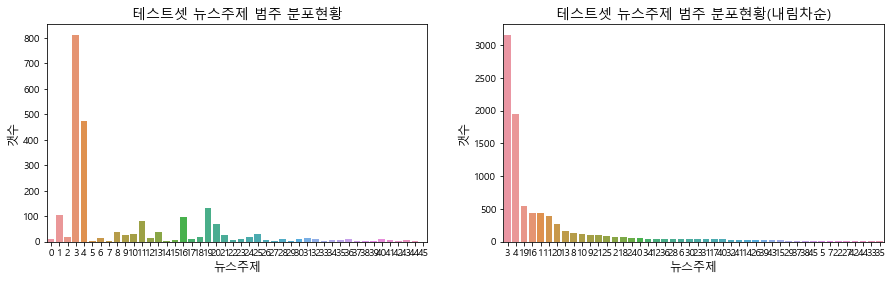

In [24]:
# 테스트 데이터셋 중 뉴스주제 범주(타겟) 분포그래프
fig = plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
ax = sns.barplot(x = 'number', y = 'frequency', data = y_tt_tb) 
ax.set_title('테스트셋 뉴스주제 범주 분포현황', size = 14) 
ax.set_xlabel('뉴스주제', size = 12) 
ax.set_ylabel('갯수', size = 12)

plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'number', y = 'frequency', data = y_tt_tb_sorted, 
                order = y_tr_tb_sorted.number.values) 
ax.set_title('테스트셋 뉴스주제 범주 분포현황(내림차순)', size = 14) 
ax.set_xlabel('뉴스주제', size = 12) 
ax.set_ylabel('갯수', size = 12)

# <font color = 'blue'>로이터 뉴스 딕셔너리 로딩</font>

### 로이터 뉴스 딕셔너리
* 로이터 뉴스 데이터셋에는 개별 뉴스마다 단어가 들어 있는 것이 아나리 단어별 인덱스번호가 들어 있는 상태임 
* 각 개별 단어인덱스가 어떠한 단어명인지를 확인하기 위해서 딕셔너리 포맷으로 그 정보를 별도로 제공하고 있음

In [25]:
# 로이터 뉴스 딕셔너리 로딩
word_index = reuters.get_word_index()

print(type(word_index), len(word_index))
# - 객체형식은 딕셔너리포맷임
# - keys(): 로이터 뉴스를 구성하고 있는 단어명
# - values(): 로이터 뉴스를 구성하고 있는 단어인덱스번호
# - items(): 로이터 뉴스를 구성하고 있는 단어명(keys())과 단어인덱스번호(values()) 조회

word_index

<class 'dict'> 30979


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

#### 로이터뉴스 딕셔너리 단어명(keys) 조회

In [26]:
# 로이터 뉴스를 구성하고 있는 단어명 조회
print('로이터뉴스 딕셔너리 단어명(keys) 갯수:', len(word_index.keys()), '\n')
print('단어명(keys) 내용:\n', word_index.keys())

로이터뉴스 딕셔너리 단어명(keys) 갯수: 30979 

단어명(keys) 내용:
 dict_keys(['mdbl', 'fawc', 'degussa', 'woods', 'hanging', 'localized', 'sation', 'chanthaburi', 'refunding', 'hermann', 'passsengers', 'stipulate', 'heublein', 'screaming', 'tcby', 'four', 'grains', 'broiler', 'wooden', 'wednesday', 'highveld', 'duffour', '0053', 'elections', '270', '271', '272', '273', '274', 'rudman', '276', '277', '278', '279', 'dormancy', 'errors', 'deferred', 'sptnd', 'cooking', 'stratabit', 'designing', 'metalurgicos', 'databank', '300er', 'shocks', 'nawg', 'tnta', 'perforations', 'affiliates', '27p', 'ching', 'china', 'wagyu', 'affiliated', 'chino', 'chinh', 'slickline', 'doldrums', 'kids', 'climbed', 'controversy', 'kidd', 'spotty', 'rebel', 'millimetres', 'golden', 'projection', 'stern', "hudson's", 'dna', 'dnc', 'hodler', 'lme', 'insolvancy', 'music', 'therefore', 'dns', 'distortions', 'thassos', 'populations', 'meteorologist', 'loss', 'exco', 'adventist', 'murchison', 'locked', 'kampala', 'arndt', 'nakasone', '

In [27]:
# 로이터 뉴스 딕셔너리를 구성하고 있는 단어명 소팅조회
sorted(word_index.keys())[0:10]

["'",
 "''",
 "'29",
 "'87",
 "'ali",
 "'at",
 "'bankrupt",
 "'current",
 "'due",
 "'event'"]

#### 로이터뉴스 딕셔너리 단어인덱스번호(values) 조회

In [28]:
# 로이터 뉴스를 구성하고 있는 단어인덱스번호 조회
print('로이터뉴스 딕셔너리 단어인덱스번호(values) 갯수:', len(word_index.values()), '\n')
print('단어인덱스번호(values) 내용:\n', word_index.values())

로이터뉴스 딕셔너리 단어인덱스번호(values) 갯수: 30979 

단어인덱스번호(values) 내용:
 dict_values([10996, 16260, 12089, 8803, 13796, 20672, 20673, 20675, 10997, 8804, 20676, 20677, 8352, 20713, 16261, 185, 1642, 20680, 12090, 1220, 13797, 7593, 20681, 3914, 2563, 3551, 5113, 3552, 3400, 7975, 3401, 3478, 3632, 4309, 9381, 7247, 3086, 20683, 8805, 20684, 16262, 20685, 13798, 20686, 20687, 7972, 20688, 20689, 2891, 20690, 16263, 595, 16264, 3189, 16265, 16266, 20692, 13799, 12092, 3028, 6693, 20693, 12093, 12639, 9382, 4007, 5689, 12094, 7903, 10066, 20695, 20696, 2394, 20697, 13800, 1984, 10998, 6959, 13801, 20698, 8806, 43, 9383, 20813, 16267, 10999, 13802, 20699, 1267, 20700, 3633, 3029, 10067, 13803, 13804, 850, 20701, 16268, 7973, 4677, 6422, 16269, 1858, 16270, 20702, 20703, 16271, 20704, 20705, 20706, 11000, 12095, 20707, 20708, 2461, 20709, 16272, 20711, 16273, 16274, 20712, 16275, 11001, 4205, 16276, 1916, 4819, 6164, 12096, 6165, 8807, 11129, 20714, 20715, 20716, 1788, 13805, 8808, 13806, 20717, 20718, 

In [29]:
# 로이터 뉴스 딕셔너리를 구성하고 있는 단어인덱스번호 소팅조회
sorted(word_index.values())[0:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#### 로이터뉴스 딕셔너리 단어명(keys)과 단어인덱스번호(values) 조회

In [30]:
# 로이터 뉴스를 구성하고 있는 단어명과 단어인덱스번호 조회
print('단어명 & 단어인덱스번호 갯수:', len(word_index.items()), '\n')
print('단어명 & 단어인덱스번호 내용:\n', word_index.items())

단어명 & 단어인덱스번호 갯수: 30979 

단어명 & 단어인덱스번호 내용:
 dict_items([('mdbl', 10996), ('fawc', 16260), ('degussa', 12089), ('woods', 8803), ('hanging', 13796), ('localized', 20672), ('sation', 20673), ('chanthaburi', 20675), ('refunding', 10997), ('hermann', 8804), ('passsengers', 20676), ('stipulate', 20677), ('heublein', 8352), ('screaming', 20713), ('tcby', 16261), ('four', 185), ('grains', 1642), ('broiler', 20680), ('wooden', 12090), ('wednesday', 1220), ('highveld', 13797), ('duffour', 7593), ('0053', 20681), ('elections', 3914), ('270', 2563), ('271', 3551), ('272', 5113), ('273', 3552), ('274', 3400), ('rudman', 7975), ('276', 3401), ('277', 3478), ('278', 3632), ('279', 4309), ('dormancy', 9381), ('errors', 7247), ('deferred', 3086), ('sptnd', 20683), ('cooking', 8805), ('stratabit', 20684), ('designing', 16262), ('metalurgicos', 20685), ('databank', 13798), ('300er', 20686), ('shocks', 20687), ('nawg', 7972), ('tnta', 20688), ('perforations', 20689), ('affiliates', 2891), ('27p', 20690),

In [31]:
# 로이터 뉴스를 구성하고 있는 단어명과 단어인덱스번호 소팅조회
sorted(word_index.items())[0:10]

[("'", 6709),
 ("''", 25893),
 ("'29", 24564),
 ("'87", 22298),
 ("'ali", 21900),
 ("'at", 20054),
 ("'bankrupt", 23734),
 ("'current", 25188),
 ("'due", 22033),
 ("'event'", 23024)]

### 로이터 뉴스 딕셔너리 리버싱(reversing)
* 현재 로이터 뉴스 딕셔너리에 들어 있는 구조는 
<br>키(key)에 뉴스에 사용된 단어명이, 값(value)에 뉴스에 사용된 단어인덱스번호가 있음
* 이를 키(key)에 뉴스에 사용된 단어인덱스번호를, 값(value)에 뉴스에 사용된 단어명으로 리버싱 해 놓으면 
<br>로이터 뉴스를 구성하는 개별 레코드들의 뉴스인덱스번호를 구체적인 뉴스내용으로 디코딩(decoding)해 볼 수 있음

In [32]:
# 로이터 뉴스 딕셔너리 리버싱(reversing)
rev_word_index = {value:key for key, value in word_index.items()}

print(type(rev_word_index), len(rev_word_index))
# - 객체형식은 딕셔너리포맷임
# - keys(): 로이터 뉴스를 구성하고 있는 단어인덱스번호
# - values(): 로이터 뉴스를 구성하고 있는 단어명
# - items(): 로이터 뉴스를 구성하고 있는 단어인덱스번호(keys())과 단어명(values()) 조회

rev_word_index

<class 'dict'> 30979


{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

#### 로이터뉴스 리버싱 딕셔너리 단어인덱스번호(keys) 조회

In [33]:
# 로이터 뉴스 리버싱 딕셔너리를 구성하고 있는 단어인덱스번호 조회
print('로이터뉴스 리버싱 딕셔너리 단어인덱스번호(keys) 갯수:', len(rev_word_index.keys()), '\n')
print('단어인덱스번호(keys) 내용:\n', rev_word_index.keys())

로이터뉴스 리버싱 딕셔너리 단어인덱스번호(keys) 갯수: 30979 

단어인덱스번호(keys) 내용:
 dict_keys([10996, 16260, 12089, 8803, 13796, 20672, 20673, 20675, 10997, 8804, 20676, 20677, 8352, 20713, 16261, 185, 1642, 20680, 12090, 1220, 13797, 7593, 20681, 3914, 2563, 3551, 5113, 3552, 3400, 7975, 3401, 3478, 3632, 4309, 9381, 7247, 3086, 20683, 8805, 20684, 16262, 20685, 13798, 20686, 20687, 7972, 20688, 20689, 2891, 20690, 16263, 595, 16264, 3189, 16265, 16266, 20692, 13799, 12092, 3028, 6693, 20693, 12093, 12639, 9382, 4007, 5689, 12094, 7903, 10066, 20695, 20696, 2394, 20697, 13800, 1984, 10998, 6959, 13801, 20698, 8806, 43, 9383, 20813, 16267, 10999, 13802, 20699, 1267, 20700, 3633, 3029, 10067, 13803, 13804, 850, 20701, 16268, 7973, 4677, 6422, 16269, 1858, 16270, 20702, 20703, 16271, 20704, 20705, 20706, 11000, 12095, 20707, 20708, 2461, 20709, 16272, 20711, 16273, 16274, 20712, 16275, 11001, 4205, 16276, 1916, 4819, 6164, 12096, 6165, 8807, 11129, 20714, 20715, 20716, 1788, 13805, 8808, 13806, 20717, 20718, 10

In [34]:
# 로이터 뉴스 딕셔너리를 구성하고 있는 단어인덱스번호 소팅조회
sorted(rev_word_index.keys())[0:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#### 로이터뉴스 리버싱 딕셔너리 단어명(values) 조회

In [35]:
# 로이터 뉴스 리버싱 딕셔너리를 구성하고 있는 단어명 조회
print('로이터뉴스 리버싱 딕셔너리 단어명(values) 갯수:', len(rev_word_index.values()), '\n')
print('단어명(values) 내용:\n', rev_word_index.values())

로이터뉴스 리버싱 딕셔너리 단어명(values) 갯수: 30979 

단어명(values) 내용:
 dict_values(['mdbl', 'fawc', 'degussa', 'woods', 'hanging', 'localized', 'sation', 'chanthaburi', 'refunding', 'hermann', 'passsengers', 'stipulate', 'heublein', 'screaming', 'tcby', 'four', 'grains', 'broiler', 'wooden', 'wednesday', 'highveld', 'duffour', '0053', 'elections', '270', '271', '272', '273', '274', 'rudman', '276', '277', '278', '279', 'dormancy', 'errors', 'deferred', 'sptnd', 'cooking', 'stratabit', 'designing', 'metalurgicos', 'databank', '300er', 'shocks', 'nawg', 'tnta', 'perforations', 'affiliates', '27p', 'ching', 'china', 'wagyu', 'affiliated', 'chino', 'chinh', 'slickline', 'doldrums', 'kids', 'climbed', 'controversy', 'kidd', 'spotty', 'rebel', 'millimetres', 'golden', 'projection', 'stern', "hudson's", 'dna', 'dnc', 'hodler', 'lme', 'insolvancy', 'music', 'therefore', 'dns', 'distortions', 'thassos', 'populations', 'meteorologist', 'loss', 'exco', 'adventist', 'murchison', 'locked', 'kampala', 'arndt', 'na

In [36]:
# 로이터 뉴스 리버싱 딕셔너리를 구성하고 있는 단어명 소팅조회
sorted(rev_word_index.values())[0:10]

["'",
 "''",
 "'29",
 "'87",
 "'ali",
 "'at",
 "'bankrupt",
 "'current",
 "'due",
 "'event'"]

#### 로이터뉴스 리버싱 딕셔너리 단어인덱스번호(keys)와 단어명(values) 조회

In [37]:
# 로이터 뉴스를 구성하고 있는 단어인덱스번호와 단어명 조회
print('단어인덱스번호 & 단어명 갯수:', len(rev_word_index.items()), '\n')
print('단어인덱스번호 & 단어명 내용:\n', rev_word_index.items())

단어인덱스번호 & 단어명 갯수: 30979 

단어인덱스번호 & 단어명 내용:
 dict_items([(10996, 'mdbl'), (16260, 'fawc'), (12089, 'degussa'), (8803, 'woods'), (13796, 'hanging'), (20672, 'localized'), (20673, 'sation'), (20675, 'chanthaburi'), (10997, 'refunding'), (8804, 'hermann'), (20676, 'passsengers'), (20677, 'stipulate'), (8352, 'heublein'), (20713, 'screaming'), (16261, 'tcby'), (185, 'four'), (1642, 'grains'), (20680, 'broiler'), (12090, 'wooden'), (1220, 'wednesday'), (13797, 'highveld'), (7593, 'duffour'), (20681, '0053'), (3914, 'elections'), (2563, '270'), (3551, '271'), (5113, '272'), (3552, '273'), (3400, '274'), (7975, 'rudman'), (3401, '276'), (3478, '277'), (3632, '278'), (4309, '279'), (9381, 'dormancy'), (7247, 'errors'), (3086, 'deferred'), (20683, 'sptnd'), (8805, 'cooking'), (20684, 'stratabit'), (16262, 'designing'), (20685, 'metalurgicos'), (13798, 'databank'), (20686, '300er'), (20687, 'shocks'), (7972, 'nawg'), (20688, 'tnta'), (20689, 'perforations'), (2891, 'affiliates'), (20690, '27p'),

In [38]:
# 로이터 뉴스 리버싱 딕셔너리를 구성하고 있는 단어인덱스번호와 단어명 소팅조회
sorted(rev_word_index.items())[0:10]

# - 가장 등장빈도가 높은 단어 순으로 상위 10개 단어 조회
# - 인덱스번호가 낮을 수록(1, 2, 3, ...) 사용빈도(우선순위)가 높은 단어명임

[(1, 'the'),
 (2, 'of'),
 (3, 'to'),
 (4, 'in'),
 (5, 'said'),
 (6, 'and'),
 (7, 'a'),
 (8, 'mln'),
 (9, '3'),
 (10, 'for')]

In [39]:
# 로이터 뉴스 리버싱 딕셔너리를 구성하고 있는 단어인덱스번호와 단어명 소팅조회
sorted(rev_word_index.items())[30969:]

# - 가장 등장빈도가 낮은 단어 순으로 하위 10개 단어 조회
# - 인덱스번호가 높을 수록(..., 30977, 30978, 30979) 사용빈도(우선순위)가 낮은 단어명임

[(30970, 'clampdown'),
 (30971, 'corporacion'),
 (30972, 'staalfabrieken'),
 (30973, 'odilon'),
 (30974, "guard's"),
 (30975, 'recirculation'),
 (30976, 'capco'),
 (30977, 'figueras'),
 (30978, 'jung'),
 (30979, 'northerly')]

### 로이터 뉴스 내용 확인
* 리버싱 딕셔너리를 활용해 로이터 뉴스레코드별 뉴스단어인덱스번호를 구체적인 뉴스단어로 변환해 내용을 확인

#### 특정 단어인덱스번호의 단어명 확인

In [40]:
# 특정 단어인덱스번호의 단어명 확인
print('1번째 사용빈도를 보이는 단어:', rev_word_index.get(1))
print('100번째 사용빈도를 보이는 단어:', rev_word_index.get(100))
print('30300번째 사용빈도를 보이는 단어:', rev_word_index.get(30300))

1번째 사용빈도를 보이는 단어: the
100번째 사용빈도를 보이는 단어: group
30300번째 사용빈도를 보이는 단어: sullivan's


#### 특정 뉴스기사 단어인덱스번호의 단어명 구성내용 확인

In [41]:
# 개별 뉴스의 단어인덱스번호 확인
print('첫번째 로이터 뉴스레코드의 단어인덱스번호 조회:\n', X_train[0])

첫번째 로이터 뉴스레코드의 단어인덱스번호 조회:
 [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [42]:
# 개별 뉴스의 단어인덱스번호를 이용한 실제 단어명 구성내용 확인
# - for 구문에 print() 함수이용

for i in X_train[0]:
    print(rev_word_index.get(i), end = ' ')

the of of mln loss for plc said at only ended said of could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 of oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs 

In [43]:
# 개별 뉴스의 단어인덱스번호를 이용한 실제 단어명 구성내용 확인
# - for 구문에 join() 함수이용

decoded_news = ' '.join([rev_word_index.get(i) for i in X_train[0]])
decoded_news

'the of of mln loss for plc said at only ended said of could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 of oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

# <font color = 'blue'>데이터 전처리</font>

### 피처셋 구조변환: 토큰화 + 원핫인코딩(one-hot encoding)
* 가변길이 시퀀스배열에서 동일길이 이진벡터행렬포맷으로 변환
* 현재 뉴스레코드마다 들어 있는 단어인덱스번호는 숫자리스트(시퀀스) 구성도 다르고, 그 갯수(길이)도 달라서 가변형으로 존재하고 있는 형식임
* 피처셋의 구조는 각 레코드마다 동일한 길이를 가져야 하므로 현재 상태에서는 딥러닝에 투입할 수 없는 구조임
* 피처셋의 뉴스레코드별 구성형식을 표준화하기 위해서 토큰화(tokenization)와 원핫인코딩(one-hot-encoding) 방식을 적용함<pre></pre>
* <font color = 'red'>토큰화(tokenization)</font>: 
<br>시퀀스를 구성하는 일련의 텍스트나 숫자 리스트를 개별적인 단어나 숫자 하나씩으로 분리하고, 
<br>분리된 개별 단어나 숫자마다 인덱스번호를 부여함 
* <font color = 'red'>원핫인코딩(one-hot-encoding)</font>:
<br>토큰화를 통해 동일한 길이로 만들어진 시퀀스마다 해당 단어나 숫자의 존재유무를 
<br>1과 0으로 구성된 이진 벡터행렬형식으로 변경해 시퀀스 길이를 동일하게 맞춤
<img src = './../../images/token_ohe.png'>

### 피처셋 구조변환: 토큰화 + 단어 임베딩(word embedding)
* <font color = 'red'>기존 원핫인코딩(one-hot-encoding) 방식의 문제점</font>: <font color = 'blue'>희소 표현(Sparse Represnetation)</font>
<br> - 원핫인코딩은 단어갯수만큼의 차원을 구성하고 특정단어의 위치를 1과 0을 이용해 독립적으로 한 곳에만 표현하는 방법임
<br> - 원-핫-인코딩 방식으로 만들어지는 이진벡터 행렬은 일부만 1이고 거의 대부분의 요소가 0으로 구성된 <font color = 'blue'>고차원 희소벡터(sparse vector)</font> 형태임
<br> - 단어집합의 크기(단어갯수)가 늘어날수록 분석대상 피처셋의 벡터차원이 늘어나는 차원의 저주(curse of dimensionality) 문제가 발생함
<br> - 단어갯수만큼의 피처/입력/예측/독립 변수갯수가 만들어져 계산복잡성이 기하급수적으로 늘어나 분류예측 성능은 오히려 0으로 수렴하게 됨
<br> - 또한 단어간 존재하는 유의어, 반의어 등 관계나 단어배치 순서 등의 정보를 누락한채 독립적으로만 단어들을 배치하는 문제점이 있음 

* <font color = 'red'>단어 임베딩(word embedding) 방식의 필요성</font>: <font color = 'blue'>분산 표현(Distributed Represnetation)</font>
<br> - 단어임베딩은 특정단어의 의미를 미리 설정한 여러 차원(보통 2-~200차원 길이)에 걸쳐 연속형 실수 값을 갖는 수치벡터로 분산배치하는 방식임
<br> - 몇 천, 몇 만 차원을 가진 원핫인코딩 방식의 희소벡터보다 규모가 작은 <font color = 'blue'>저차원 밀집벡터(dense vector)</font> 구조라 연산속도와 메모리 이용이 효율적임
<br> - 각 단어별 의미를 나타내는 연속형 실수값들이 여러 차원에 걸쳐 배치되어 있어서 단어간 유사도, 단어순서(시퀀스) 파악이 용이함
<br> - 비슷한 위치나 가까운 위치에 있는 단어들은 유사한 의미를 가지며, 멀리 떨어진 위치에 임베딩된 단어는 의미가 다르다는 가정임
<br> - 이를 통해 특정단어를 중심(중심어: center world)으로 주변단어(맥락:context word)를 예측하거나, 주변단어를 토대로 중심단어를 예측할 수 있음
<br> - 즉, 주변에 있는 단어들이 비슷한 분포를 가지는 단어들은 서로 유사한 의미를 가지므로 연속형 실수값 벡터들도 비슷한 수치를 배정하게 됨
<br> - 이러한 단어 임베딩 방식의 텍스트 데이터를 학습하기 위하여  순환신경망(recurrent neural network), 단어주머니(CBOW: continuous bag of words), 
<br>장단기메모리(LSTM:long-short term memory), 워드투벡터(Word2Vec) 등의 기법이 나타남
<img src = './../../images/word_embedding.png'>

### 단어임베딩 학습방법: 순환신경망(RNN) + 장단기기억메모리(LSTM)

#### (1) 순환신경망의 필요성

<img src = './../../images/rnn.png'>

#### (2) 순환신경망 학습원리

<img src = './../../images/rnn_logic.png'>

#### (3) 순환신경망 싱글윈도우

<img src = './../../images/rnn_single_window.png'>

#### (4) 순환신경망 기울기소실문제와 장단기메모리(LSTM) 네트워크 필요성

<img src = './../../images/rnn_lstm.png'>

#### (5) 입력과 출력방식에 따른 순환신경망 활용  

<img src = './../../images/rnn_case.png'>

### (참고) 토큰화 + 원핫인코딩 방식 vs. 토큰화 + 단어임베딩방식 비교

#### 시퀀스데이터 생성과 토큰화 작업

In [44]:
# 구성숫자와 길이가 다른 다차원배열 형식의 시퀀스 데이터 준비
ex = np.array([[1, 3], 
               [2, 7, 4, 2], 
               [8, 3, 5]])
ex

array([list([1, 3]), list([2, 7, 4, 2]), list([8, 3, 5])], dtype=object)

In [45]:
# 토큰화 모듈 로딩
from keras.preprocessing.text import Tokenizer

In [46]:
# 토큰화 객체생성
tokenizer = Tokenizer(num_words = 10)

# - num_words: 모든 시퀀스(텍스트 또는 숫자 리스트)를 포함할 수 있는 고정길이(자리수)를 지정함
# - 현재 ex객체에 들어 있는 숫자시퀀스는 1 ~ 7까지 이므로 여유있게 10개 자리로 지정함
# - 또는 모든 시퀀스(텍스트 또는 숫자 리스트)를 포함하지 않고, 
#   가장 사용빈도가 높은 일정규모의 단어만 선택하는 의미로 고정길이(자리수)를 지정해도 됨

#### 기존의 원핫인코딩을 이용한 단어 벡터행렬 만들기

In [47]:
# 토큰화 객체를 이용해 가변길이 시퀀스데이터를 원핫인코딩 방식의 고정길이 벡터행렬형식으로 변환함
ex_tkn = tokenizer.sequences_to_matrix(ex, mode = 'binary')

print(ex_tkn.shape)
ex_tkn

# - ex 객체의 길이가 다른 요소들이 길이가 동일한 이진벡터로 변환됨
# - 첫 번째 요소인 [1, 3] 시퀀스가       ==> [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.] 10개 자리 이진벡터로 변환됨
# - 두 번째 요소인 [2, 7, 4, 2] 시퀀스가 ==> [0., 0., 1., 0., 1., 0., 0., 1., 0., 0.] 10개 자리 이진벡터로 변환됨
# - 세 번째 요소인 [8, 3, 5] 시퀀스가    ==> [0., 0., 0., 1., 0., 1., 0., 0., 1., 0.] 10개 이진벡터로 변환됨

# - 변경된 이진 벡터행렬 데이터형식은 원본하고 비교했을 때
#   레코드 갯수는 3개로 변함이 없으며, 변수컬럼 갯수는 기존 가변길이에서 10개 변수컬럼을 가진 고정길이로 설정됨
# - ex_kn.shape ==> (3, 10)

(3, 10)


array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1., 0.]])

#### 단어 임베딩을 위해 패딩(padding) 방식으로 단어갯수 만큼의 벡터행렬 만들기
* 각 뉴스레코드를 구성하고 있는 단어인덱스번호들의 갯수가 제각각인 가변길이이므로
<br>원핫인코딩 방식이 아닌 다른방식으로 길이를 동일하게 고정해 놓아야 함
* 패딩(padding)이라는 방식을 통해 임의의 길이규모를 모든 뉴스레코드 마다 동일하게 적용하여,
<br>이 길이기준보다 뉴스레코드 단어인덱스번호가 넘치면 잘라내며, 부족하면 0으로 채우게 됨

In [48]:
# 단어임베딩을 위한 시퀀스 모듈 로딩
from keras.preprocessing import sequence

In [49]:
# 패팅관련 함수를 이용해 모든 뉴스레코드의 길이를 임의의 길이만큼 통일시킴
sequence.pad_sequences(ex, maxlen = 10)

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 3],
       [0, 0, 0, 0, 0, 0, 2, 7, 4, 2],
       [0, 0, 0, 0, 0, 0, 0, 8, 3, 5]])

### 피처셋 구조변환 실시

In [50]:
# 로이터 뉴스 딕셔너리 로딩
word_index = reuters.get_word_index()

# 로이터 뉴스 딕셔너리 규모파악
print(type(word_index), len(word_index))

# - 현재 로이터 뉴스를 구성하고 있는 단어갯수 규모는 30979개임
# - 따라서 가변형 길이의 다차원 배열 뉴스 레코드를 고정길이 행렬데이터 형식으로 변환할 때
#   길이(자리수) 설정을 len(word_index) + 10 정도로 설정함

<class 'dict'> 30979


In [51]:
# 피처셋 단어임베딩을 위한 시퀀스 모듈 로딩
from keras.preprocessing import sequence

In [52]:
# 패딩관련 함수를 이용해 모든 뉴스레코드의 길이를 임의의 길이만큼 통일시킴

# 단어임베딩에 사용할 임의의 고정길이 차원설정
word_len = 100 
# 100차원으로 보겠다. 뉴스가 100단어 안으로 생각하고 보겠다
# - 원핫인코딩 방식은 전체 사용단어 갯수만큼 차원으로 만드는 고차원 구조를 만들지만
#   단어임베딩 방식은 사용자가 임의로 2~200 정도의 차원중에 적정한 차원구조를 선정하게 됨

# 훈련셋 패딩
X_train_pad = sequence.pad_sequences(X_train, maxlen = word_len)

# 테스트셋 패딩
X_test_pad = sequence.pad_sequences(X_test, maxlen = word_len)

In [53]:
# 패딩을 통해 고정길이로 만든 훈련셋 일부 조회
X_train_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,    2,    2,    8,   43,   10,  447,    5,   25,
        207,  270,    5,    2,  111,   16,  369,  186,   90,   67,    7,
         89,    5,   19,  102,    6,   19,  124,   15,   90,   67,   84,
         22,  482,   26,    7,   48,    4,   49,    8,  864,   39,  209,
        154,    6,  151,    6,   83,   11,   15,   22,  155,   11,   15,
          7,   48,    9,    2, 1005,  504,    6,  258,    6,  272,   11,
         15,   22,  134,   44,   11,   15,   16,    8,  197, 1245,   90,
         67,   52,   29,  209,   30,   32,  132,    6,  109,   15,   17,
         12])

In [54]:
# 패딩을 통해 고정길이로 만든 테스트셋 일부 조회
X_test_pad[0]

array([   5,    2,    7,  748,   48,    9,    2,    7,  207, 1451,  966,
       1864,  793,   97,  133,  336,    7,    4,  493,   98,  273,  104,
        284,   25,   39,  338,   22,  905,  220,    2,  644,   59,   20,
          6,  119,   61,   11,   15,   58,  579,   26,   10,   67,    7,
          4,  738,   98,   43,   88,  333,  722,   12,   20,    6,   19,
        746,   35,   15,   10,    9, 1214,  855,  129,  783,   21,    4,
          2,  244,  364,   51,   16,  299,  452,   16,  515,    4,   99,
         29,    5,    4,  364,  281,   48,   10,    9, 1214,   23,  644,
         47,   20,  324,   27,   56,    2,    2,    5,  192,  510,   17,
         12])

In [55]:
# 시퀀스모듈의 패딩 함수를 이용해 가변길이 시퀀스데이터를 고정길이 벡터행렬형식으로 변환함

print(f'[훈련셋   피처] 가변길이구조: {X_train.shape} => 패딩길이구조: {X_train_pad.shape}')
print(f'[테스트셋 피처] 가변길이구조: {X_test.shape} => 패딩길이구조: {X_test_pad.shape}')

[훈련셋   피처] 가변길이구조: (8982,) => 패딩길이구조: (8982, 100)
[테스트셋 피처] 가변길이구조: (2246,) => 패딩길이구조: (2246, 100)


### 타겟변수 원핫인코딩: 뉴스토픽(주제) 46개를 0과 1로 구성된 더미변수화
* 타겟변수가 다항 클래스인 경우 원핫인코딩으로 변경해 0과 1로 구성된 상태로 만들어야 딥러닝 연산이 가능해짐

In [56]:
# 타겟(출력/반응/종속)변수의 다항클래스인 숫자이름표 0~9까지를 0과 1로 구성된 이진데이터셋(더미변수화)으로 변형
from keras.utils import np_utils

In [57]:
# 숫자이름표(타겟) 훈련셋 원핫인코딩
y_train_ohe = np_utils.to_categorical(y_train)

print(f'[훈련셋 타겟변수] 원본데이터 구조: {y_train.shape} => 원핫인코딩구조: {y_train_ohe.shape}')

y_train_ohe

[훈련셋 타겟변수] 원본데이터 구조: (8982,) => 원핫인코딩구조: (8982, 46)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
# 숫자이름표(타겟) 테스트셋 원핫인코딩
y_test_ohe = np_utils.to_categorical(y_test)

print(f'[테스트셋 타겟변수] 원본데이터 구조: {y_test.shape} => 원핫인코딩구조: {y_test_ohe.shape}')

y_test_ohe

[테스트셋 타겟변수] 원본데이터 구조: (2246,) => 원핫인코딩구조: (2246, 46)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# <font color = 'blue'>딥러닝 모델링</font>

### 딥러닝 라이브러리 로딩

In [59]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense, Dropout, Embedding, LSTM
# - 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌

### 랜덤 시드넘버 설정

In [60]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

### 딥러닝 모델계층 설정

In [61]:
# 딥러닝 학습계층 시퀀스객체 로딩
md = Sequential()
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있는 Sequential()메서드를 md라는 객체로 로딩함

# 딥러닝 학습계층 설계
# - Dense() 객체로 학습계층별로 여러 개 노드가 밀집된 신경망을 구현함
# - 입력층(784개노드)-은닉층(512개노드)-출력층(10개노드)

md.add(Embedding(y_train.shape[0], word_len))
# - 단어임베딩과 패딩방식으로 전처리된 피처셋을 처리하기 위한 입력계층

md.add(LSTM(word_len, activation = 'tanh'))
# - 순환신경망의 기울기 소실문제를 해결한 RNN + LSTM 딥러닝 계층
# - 활성화함수가 하이퍼볼릭탄젠트(tanh) 함수로 -1 ~ 1 사이의 값으로 만들어 줌 

md.add(Dense(256, activation = 'relu'))
# - 일반 덴스밀집층

md.add(Dense(128, activation = 'relu'))
# - 일반 덴스밀집층

md.add(Dense(46, activation = 'softmax'))
# - 딥러닝 출력층
# - 출력값을 46개로 정해서 보여주기 위해서 46으로 설정함
# - activation = 'softmax'로 활성화함수 지정해 
#   최종적인 출력값을 0, 0, 1, 0, 0, 0, ..., 0, 0, 0, 0 과 같은 원핫인코딩 방식으로 도출

# 딥러닝 계층구조 요약
md.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         898200    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 46)                5934      
Total params: 1,043,286
Trainable params: 1,043,286
Non-trainable params: 0
_________________________________________________________________


### 딥러닝 학습방법 설정

In [62]:
# 준비된 학습계층의 학습방법 설정
md.compile(loss = 'categorical_crossentropy', 
           optimizer = 'adam', metrics = ['accuracy'])

# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

### 학습모델 파일저장 옵션 설정

In [63]:
# 딥러닝 학습모델 저장폴더명 설정
import os

md_dir = './model/'
if not os.path.exists(md_dir):
    os.mkdir(md_dir)
    
# 딥러닝 학습모델별 저장파일명 변경설정
md_path = './model/ep{epoch:d}_vloss{val_loss:.3f}_vacc{val_acc:.3f}.hdf5'
# - loss: 전체데이터 중 훈련셋(training) 학습오차
# - acc: 전체데이터 중 훈련셋(training) 정확도
# - val_loss: 전체데이터 중 검증셋(validation) 오차
# - val_acc: 전체데이터 중 검증셋(validation) 정확도

# ep{epoch:d} 단위배치(batch) 작업인 엑폭번호를 정수형으로 파일명 시작부분에 기록
# vloss{val_loss:.3f} 각 학습모델의 검증데이터 오차정도를 소수3자리까지 파일에 기록
# vacc{val_acc:.3f} 각 학습모델의 검증데이터 정확정도를 소수3째자리까지 파일에 기록

### 학습모델 체크포인트 옵션 설정

In [64]:
# 학습모델 체크포인트 모듈 로딩
from keras.callbacks import ModelCheckpoint

In [65]:
# 체크포인트(checkpoint) 변경설정
cp = ModelCheckpoint(filepath = md_path, 
                     monitor = 'val_loss', 
                     verbose = 1, 
                     save_best_only = True)
# - filepath: 각 학습모델별 성능평가 파일저장 경로
# - monitor 옵션: 각 학습모델별 성능평가 기준
#   * 전체데이터 중 훈련셋(training) 학습오차: loss
#   * 전체데이터 중 훈련셋(training) 정확도: acc
#   * 전체데이터 중 검증셋(validation) 오차: val_loss
#   * 전체데이터 중 검증셋(validation) 정확도: val_acc
#   * 전체데이터 중 시험셋(테스트; test)은 별도로 분할해 놓아야 함
# - verbose: 모델별 학습진행사항 출력
# - save_best_only: 각 학습모델별 성능평가 파일저장시
#                   이전 모델보다 성능이 좋아졌을 때만 저장하도록 함

### 학습모델 과적합 방지 옵션 설정

In [66]:
# 과적합 방지용 종료 메서드 로딩
from keras.callbacks import EarlyStopping

In [67]:
# 조기종료 옵션설정
es = EarlyStopping(monitor = 'val_loss', patience = 10)
# - monitor: 검증셋 대상 모니터할 값 설정
# - patience: 검증셋 오차가 좋아지지 않아도 몇 번까지 기다릴지 설정

### 딥러닝 모델에 데이터 피팅

In [68]:
# 딥러닝 모델 최적화 훈련진행
# - 준비된 훈련계층과 훈련방법에 따라 미니배치(mini-batch) 방식으로 최적화 훈련진행
# - 훈련데이터셋을 한번에 투입해 또는 한개 샘플씩 학습을 하지 않고, 
#   일부(batch_size) 단위샘플로 나누어서 부분적으로 학습을 진행함
# - 미니배치를 하나씩 학습모델에 투입해 손실함수값을 줄이기 위한 파라미터(가중치, 편향)를 조율해 나감
# - 각 미니배치별 손실함수값을 구하고, 이들의 평균적인 오차와 정확도를 해당 모델의 성능으로 판단함
# - 또한 미니배치 단위샘플을 모두 사용하는 일련의 학습과정(에포크: epoch)을 
#   한번에 끝내는 것이 아니라 여러차례 반복실시해 모델의 성능을 개선해 나감  

history = md.fit(X_train_pad, y_train_ohe, 
                 epochs = 30, batch_size = 100, 
                 validation_split = 0.2, 
                 verbose = 1, 
                 callbacks = [cp, es])
# - 훈련셋을 100개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 30번 반복실시함

# - batch_size: 훈련데이터셋중에서 몇개 샘플을 미니배치(mini-batch)로 만들것인지 설정
#   적게설정: 빠른 훈련속도이점. 단위샘플셋에 따라 학습편차가 많이 발생. 병렬연산 못하고 하드웨어 자원낭비
#   많이설정: 훈련속도가 느려짐. 지역최소값(local minimum)에 빠질 수 있음. 하드웨어 자원에 부하가 많이 발생함)
# - epochs: 미니배치를 모두 처리하는 일련의 학습을 몇 번 정도 실시할지 설정
#   적게설정: 파라미터조율이 충분하지 않아서 과소적합 가능성
#   많이설정: 파라미터조율이 지나쳐 과대적합 가능성

# - validation_split = 0.2: 전체데이터중 훈련셋(training) 80%, 검증셋(validation) 20%로 분할하는 비율설정
# - callbacks 
#   [cp] 학습모델별 성능평가파일 생성방법 설정
#   [es] 딥러닝 과적합방지용 조기종료 옵션 설정

# 신경망 학습을 위한 데이터셋 3가지 유형
# - 훈련 데이터(training data): 매개변수(가중치와 편향) 학습
# - 검증 데이터(validation data): 하이퍼파라미터 성능 평가
# - 시험 데이터(test data): 신경망의 범용 성능 평가

# - validation_split = 0.2 대신에 별도 피처&타겟셋을 입력할 수 있음
# - validation_data = (X_testing_scaled, y_test_ohe)로 설정하면
#   시험셋을 검증용으로 투입한 것으로 볼 수 있음

Train on 7185 samples, validate on 1797 samples
Epoch 1/30
7185/7185 [==============================] - 17s 2ms/step - loss: 2.4756 - acc: 0.3408 - val_loss: 1.9857 - val_acc: 0.3495

Epoch 00001: val_loss improved from inf to 1.98567, saving model to ./model/ep1_vloss1.986_vacc0.349.hdf5
Epoch 2/30
7185/7185 [==============================] - 18s 3ms/step - loss: 1.8528 - acc: 0.4831 - val_loss: 1.7971 - val_acc: 0.5320

Epoch 00002: val_loss improved from 1.98567 to 1.79711, saving model to ./model/ep2_vloss1.797_vacc0.532.hdf5
Epoch 3/30
7185/7185 [==============================] - 18s 2ms/step - loss: 1.6250 - acc: 0.5729 - val_loss: 1.6141 - val_acc: 0.5849

Epoch 00003: val_loss improved from 1.79711 to 1.61412, saving model to ./model/ep3_vloss1.614_vacc0.585.hdf5
Epoch 4/30
7185/7185 [==============================] - 18s 2ms/step - loss: 1.5010 - acc: 0.6102 - val_loss: 1.5809 - val_acc: 0.5871

Epoch 00004: val_loss improved from 1.61412 to 1.58085, saving model to ./model/ep

# <font color = 'blue'>딥러닝 모델 성능평가</font>

### 딥러닝 학습모델 성능평가 히스토리

In [69]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 확보

# 훈련셋(training) 학습성능
y_loss = history.history['loss'] # 훈련셋 오차
y_acc = history.history['acc'] # 훈련셋 정확도

# 검증셋(validation) 학습성능
y_vloss = history.history['val_loss'] # 검증셋 오차
y_vacc = history.history['val_acc'] # 검증셋 정확도

In [70]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 객체형식과 규모
print(type(y_loss), len(y_loss))
print(type(y_acc), len(y_acc))
print(type(y_vloss), len(y_vloss))
print(type(y_vacc), len(y_vacc))

<class 'list'> 18
<class 'list'> 18
<class 'list'> 18
<class 'list'> 18


In [71]:
print('훈련셋   오차추이:', [round(i, 3) for i in y_loss])
print('테스트셋 오차추이:', [round(i, 3) for i in y_vloss])

print()

print('훈련셋   정확도추이:', [round(i, 3) for i in y_acc])
print('테스트셋 정확도추이:', [round(i, 3) for i in y_vacc])

훈련셋   오차추이: [2.476, 1.853, 1.625, 1.501, 1.38, 1.27, 1.165, 1.089, 1.005, 0.963, 0.893, 0.904, 0.799, 0.78, 0.743, 0.721, 0.662, 0.632]
테스트셋 오차추이: [1.986, 1.797, 1.614, 1.581, 1.534, 1.466, 1.438, 1.405, 1.433, 1.421, 1.566, 1.525, 1.538, 1.539, 1.59, 1.645, 1.677, 1.709]

훈련셋   정확도추이: [0.341, 0.483, 0.573, 0.61, 0.636, 0.663, 0.691, 0.71, 0.729, 0.739, 0.762, 0.755, 0.782, 0.789, 0.798, 0.804, 0.82, 0.828]
테스트셋 정확도추이: [0.349, 0.532, 0.585, 0.587, 0.593, 0.627, 0.642, 0.652, 0.666, 0.669, 0.644, 0.651, 0.662, 0.661, 0.655, 0.647, 0.661, 0.672]


### 딥러닝 학습모델 성능평가 그래프

In [72]:
# x축 설정
# - epochs = 200에 의해서 딥러닝 학습모델이 200개 만들어저 진행됨에 따라
#   학습오차, 학습정확도, 검증오차, 검증정확도가 모두 200개 값이 생성됨
# - 그런데, callbacks = [cp, es] 파라미터 설정으로 
#   개선된 베스트모델&과적합방지 학습모델에 대해서만 제한적으로  
#   학습오차, 학습정확도, 검증오차, 검증정확도가 기록됨  
#   [cp] 학습모델별 성능평가파일 생성시 
#        이전파일보다 성능이 개선된 베스트모델을 저장옵션
#   [es] 딥러닝 과적합방지용 조기종료 옵션 
x_len = np.arange(len(y_acc))
x_len

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

#### 딥러닝학습 훈련셋과 검증셋 오차 추이

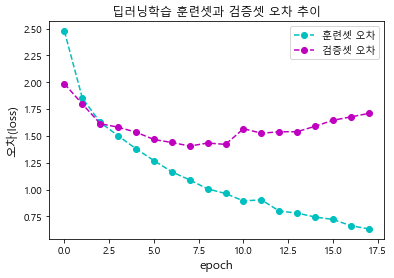

In [73]:
# 딥러닝학습 훈련셋과 검증셋 오차 추이
plt.plot(x_len, y_loss, 'co--', label = '훈련셋 오차')
plt.plot(x_len, y_vloss, 'mo--', label = '검증셋 오차')
plt.title('딥러닝학습 훈련셋과 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('오차(loss)', size = 12)
plt.legend()

# 마커설정 옵션 'co--', 'mo--'
# --> color = 'cyan', marker = 'o', linestyle = '--' 로 풀어서 코딩가능
# --> color = 'magenta', marker = 'o', linestyle = '--' 로 풀어서 코딩가능

#### 딥러닝학습 훈련셋과 검증셋 정확도 추이

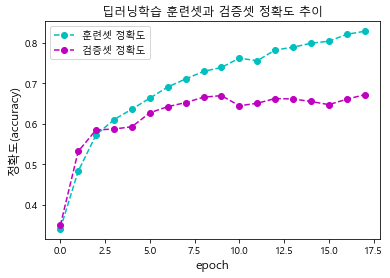

In [74]:
# 딥러닝학습 훈련셋과 검증셋 정확도 추이
plt.plot(x_len, y_acc, 'co--', label = '훈련셋 정확도')
plt.plot(x_len, y_vacc, 'mo--', label = '검증셋 정확도')
plt.title('딥러닝학습 훈련셋과 검증셋 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('정확도(accuracy)', size = 12)
plt.legend()

#### 훈련셋 딥러닝학습 오차과 정확도 추이

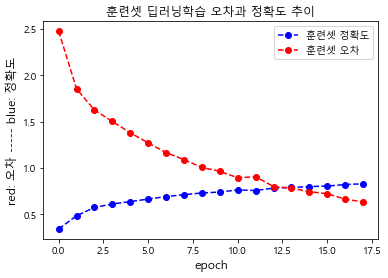

In [75]:
# 훈련셋 딥러닝학습 오차와 정확도 추이
plt.plot(x_len, y_acc, 'bo--', label = '훈련셋 정확도')
plt.plot(x_len, y_loss, 'ro--', label = '훈련셋 오차')
plt.title('훈련셋 딥러닝학습 오차과 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션 'bo--', 'ro--'
# --> color = 'blue', marker = 'o', linestyle = '--' 의미임
# --> color = 'red', marker = 'o', linestyle = '--' 의미임

#### 테스트셋 딥러닝학습 오차과 정확도 추이

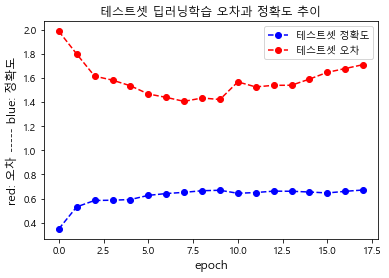

In [76]:
# 테스트셋 딥러닝학습 오차과 정확도 추이
plt.plot(x_len, y_vacc, 'bo--', label = '테스트셋 정확도')
plt.plot(x_len, y_vloss, 'ro--', label = '테스트셋 오차')
plt.title('테스트셋 딥러닝학습 오차과 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

#### 훈련셋 정확도와 검증셋 오차 추이
* 훈련셋의 정확도는 에포크(epoch)가 실행될 수록 좋아짐
* 반면에 검증셋의 오차는 에포크가 실행될 수록 더이상 좋아지지 않음
* 따라서 에포크(epoch) 회수를 통해 적정한 딥러닝 모델학습 지정이 필요함 
* 학습이 진행될수록 훈련셋의 정확도는 올라가지만, 
<br>과적합으로 인해 검증셋의 학습결과는 점점 나빠지게 됨
<img src = './images/train_validation.png'>

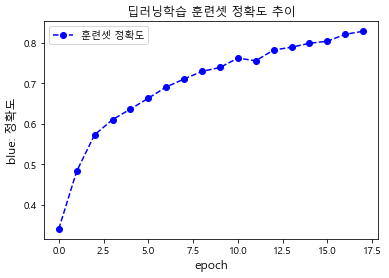

In [77]:
# 훈렷셋 딥러닝학습 정확도 추이
plt.plot(x_len, y_acc, color = 'blue', 
         marker = 'o', linestyle = '--', label = '훈련셋 정확도')
plt.title('딥러닝학습 훈련셋 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('blue: 정확도', size = 12)
plt.legend()

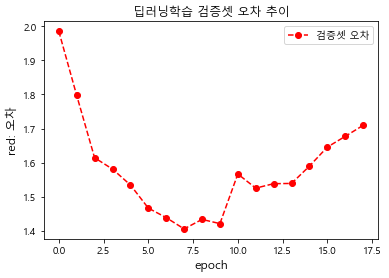

In [78]:
# 검증셋 딥러닝학습 오차 추이
plt.plot(x_len, y_vloss, color = 'red', 
         marker = 'o', linestyle = '--', label = '검증셋 오차')
plt.title('딥러닝학습 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차', size = 12)
plt.legend()

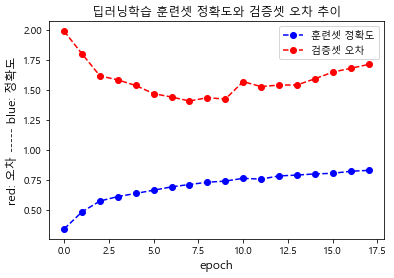

In [79]:
# 훈련셋 정확도와 검증셋 오차 추이
plt.plot(x_len, y_acc, color = 'blue', marker = 'o', 
         linestyle = '--', label = '훈련셋 정확도')
plt.plot(x_len, y_vloss, color = 'red', marker = 'o', 
         linestyle = '--', label = '검증셋 오차')
plt.title('딥러닝학습 훈련셋 정확도와 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션: color = 'red', marker = 'o', linestyle = '--'
# --> 'ro--'로 축약해서 설정가능함

### 모델 성능평가

#### 훈련셋(train) 성능평가

In [80]:
# 훈련셋을 활용한 딥러닝모델의 성능평가 결과
train_perf = md.evaluate(X_train_pad, y_train_ohe)
train_perf

8982/8982 [==============================] - 6s 695us/step


[0.7731613083741522, 0.8197506123092386]

In [81]:
print('훈련셋 모델성능 종합:', [round(i, 3) for i in train_perf])
print(f'훈련셋 모델성능 오차(loss): {train_perf[0]:11.3f}')
print(f'훈련셋 모델성능 정확도(accuracy): {train_perf[1]:0.3f}')

훈련셋 모델성능 종합: [0.773, 0.82]
훈련셋 모델성능 오차(loss):       0.773
훈련셋 모델성능 정확도(accuracy): 0.820


#### 테스트셋(test) 성능평가

In [82]:
# 테스트셋을 활용한 딥러닝모델의 성능평가 결과
test_perf = md.evaluate(X_test_pad, y_test_ohe)
test_perf

2246/2246 [==============================] - 2s 703us/step


[1.8007526130200706, 0.6593944791269855]

In [83]:
print('테스트셋 모델성능 종합:', [round(i, 3) for i in test_perf])
print(f'테스트셋 모델성능 오차(loss): {test_perf[0]:11.3f}')
print(f'테스트셋 모델성능 정확도(accuracy): {test_perf[1]:0.3f}')

테스트셋 모델성능 종합: [1.801, 0.659]
테스트셋 모델성능 오차(loss):       1.801
테스트셋 모델성능 정확도(accuracy): 0.659


#### 훈련셋과 테스트셋 성능평가 비교

In [84]:
# 오차(loss) 비교
diff_loss = test_perf[0] - train_perf[0] 

# 정확도(accuracy) 비교
diff_acc = test_perf[1] - train_perf[1] 

In [85]:
print(f'[오차      (loss)] 훈련셋: {train_perf[0]:0.3f}, 테스트셋: {test_perf[0]:0.3f}, 차이: {diff_loss:0.3f}')
print(f'[정확도(accuracy)] 훈련셋: {train_perf[1]:0.3f}, 테스트셋: {test_perf[1]:0.3f}, 차이: {diff_acc:0.3f}')

[오차      (loss)] 훈련셋: 0.773, 테스트셋: 1.801, 차이: 1.028
[정확도(accuracy)] 훈련셋: 0.820, 테스트셋: 0.659, 차이: -0.160


### 혼동표 분석

In [86]:
# 실제 테스트셋 숫자이름표
y_test

array([ 3, 10,  1, ...,  3,  3, 24], dtype=int64)

In [87]:
# 딥러닝모델의 예측 숫자이름표 
md_y_pred = md.predict_classes(X_test_pad)
md_y_pred

array([ 3, 10, 13, ...,  3,  3,  1], dtype=int64)

In [88]:
# sklearn 성능평가 모듈 로딩
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [89]:
# 실제y값과 예측y값 간의 혼동표 생성
cm = confusion_matrix(y_test, md_y_pred)
cm

array([[ 1,  1,  0, ...,  0,  0,  0],
       [ 0, 76,  0, ...,  0,  0,  0],
       [ 0,  5,  3, ...,  0,  0,  1],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  1]], dtype=int64)

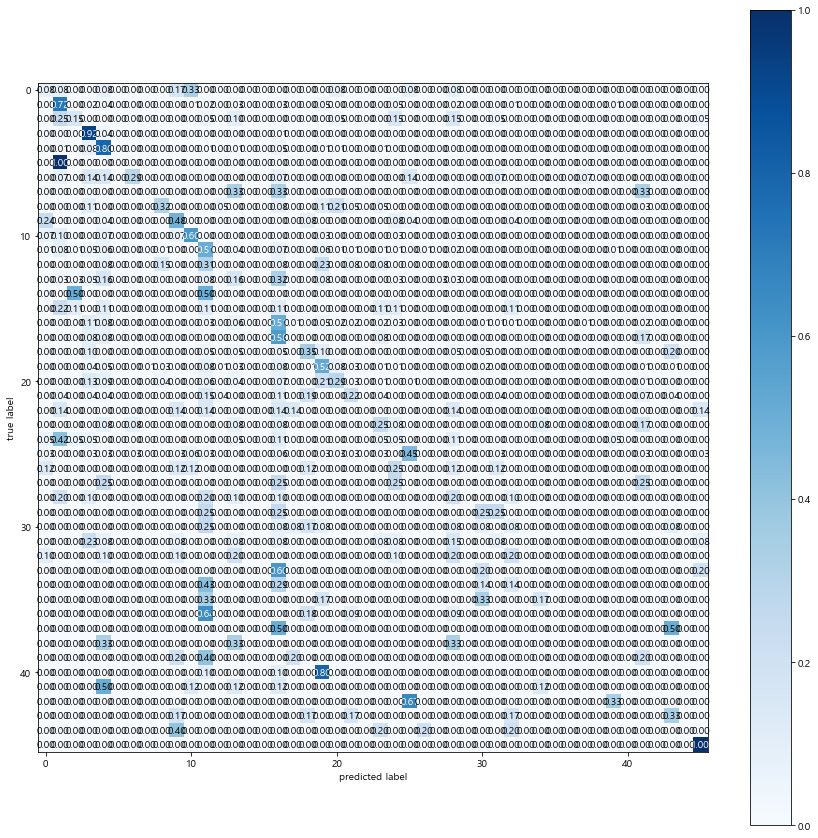

In [90]:
# 혼동표 시각화
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig = plot_confusion_matrix(conf_mat = cm,
                            colorbar = True,
                            show_absolute = False,
                            show_normed = True,
                            figsize = (15, 15))

In [91]:
# 혼동표 리포트용 뉴스토픽 레이블 준비

topic = list(range(46))
print('혼동표용 토픽 숫자형:\n', topic)

print()

topic_str = [str(i) for i in topic]
print('혼동표용 토픽 문자형 레이블:\n', topic_str)

혼동표용 토픽 숫자형:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]

혼동표용 토픽 문자형 레이블:
 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45']


In [92]:
# 혼동표 성능분석
print(classification_report(y_test, md_y_pred,
                            target_names = topic_str))

              precision    recall  f1-score   support

           0       0.06      0.08      0.07        12
           1       0.63      0.72      0.67       105
           2       0.38      0.15      0.21        20
           3       0.90      0.92      0.91       813
           4       0.81      0.80      0.80       474
           5       0.00      0.00      0.00         5
           6       0.67      0.29      0.40        14
           7       0.00      0.00      0.00         3
           8       0.50      0.32      0.39        38
           9       0.46      0.48      0.47        25
          10       0.67      0.60      0.63        30
          11       0.40      0.51      0.45        83
          12       0.00      0.00      0.00        13
          13       0.13      0.16      0.15        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.32      0.51      0.39        99
          17       0.00    

# <font color = 'blue'>LSTM과 CNN을 조합</font>

* 분석대상 텍스트를 구성하는 단어나 숫자 시퀀스 하나하나를 일일이 분석하는 것이 아니라
<br> 지역적인 단어시퀀스 분석을 통해 중요한 지역패턴을 분석하기 위해 컨볼루션신경망과 맥스풀링 기법을 같이 적용함
* 기존의 이미지 분석시에는 가로X세로 2차원 구조를 감안한 Conv2D, MaxPooling2D를 사용했지만
<br> 텍스트 테이터는 가로방향의 1차원 시퀀스이므로 Conv1D, MaxPooing1D를 사용하면 됨
<img src = './../../images/rnn_lstm_cnn_maxpooling.png'>

### 딥러닝 라이브러리 로딩

In [93]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, MaxPooling1D
# - 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌

### 랜덤 시드넘버 설정

In [94]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

### 딥러닝 모델계층 설정

In [95]:
# 딥러닝 학습계층 시퀀스객체 로딩
md = Sequential()
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있는 Sequential()메서드를 md라는 객체로 로딩함

# 딥러닝 학습계층 설계
# - Dense() 객체로 학습계층별로 여러 개 노드가 밀집된 신경망을 구현함
# - 입력층(784개노드)-은닉층(512개노드)-출력층(10개노드)

md.add(Embedding(y_train.shape[0], word_len))
# - 단어임베딩과 패딩방식으로 전처리된 피처셋을 처리하기 위한 입력계층

md.add(Dropout(0.5))
# - 과적합을 방지하기 위한 드롭아웃옵션(일부 노드/유닛을 비활성화해줌)

md.add(Conv1D(64, 5, padding = 'valid', activation = 'relu', strides = 1))

md.add(MaxPooling1D(pool_size = 4))

md.add(LSTM(word_len, activation = 'tanh'))
# - 순환신경망의 기울기 소실문제를 해결한 RNN + LSTM 딥러닝 계층
# - 활성화함수가 하이퍼볼릭탄젠트(tanh) 함수로 -1 ~ 1 사이의 값으로 만들어 줌 

md.add(Dense(256, activation = 'relu'))
# - 일반 덴스밀집층

md.add(Dense(128, activation = 'relu'))
# - 일반 덴스밀집층

md.add(Dense(46, activation = 'softmax'))
# - 딥러닝 출력층
# - 출력값을 46개로 정해서 보여주기 위해서 46으로 설정함
# - activation = 'softmax'로 활성화함수 지정해 
#   최종적인 출력값을 0, 0, 1, 0, 0, 0, ..., 0, 0, 0, 0 과 같은 원핫인코딩 방식으로 도출

# 딥러닝 계층구조 요약
md.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         898200    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
__________

### 딥러닝 학습방법 설정

In [96]:
# 준비된 학습계층의 학습방법 설정
md.compile(loss = 'categorical_crossentropy', 
           optimizer = 'adam', metrics = ['accuracy'])

# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

### 학습모델 파일저장 옵션 설정

In [97]:
# 딥러닝 학습모델 저장폴더명 설정
import os

md_dir = './model/'
if not os.path.exists(md_dir):
    os.mkdir(md_dir)
    
# 딥러닝 학습모델별 저장파일명 변경설정
md_path = './model/ep{epoch:d}_vloss{val_loss:.3f}_vacc{val_acc:.3f}.hdf5'
# - loss: 전체데이터 중 훈련셋(training) 학습오차
# - acc: 전체데이터 중 훈련셋(training) 정확도
# - val_loss: 전체데이터 중 검증셋(validation) 오차
# - val_acc: 전체데이터 중 검증셋(validation) 정확도

# ep{epoch:d} 단위배치(batch) 작업인 엑폭번호를 정수형으로 파일명 시작부분에 기록
# vloss{val_loss:.3f} 각 학습모델의 검증데이터 오차정도를 소수3자리까지 파일에 기록
# vacc{val_acc:.3f} 각 학습모델의 검증데이터 정확정도를 소수3째자리까지 파일에 기록

### 학습모델 체크포인트 옵션 설정

In [98]:
# 학습모델 체크포인트 모듈 로딩
from keras.callbacks import ModelCheckpoint

In [99]:
# 체크포인트(checkpoint) 변경설정
cp = ModelCheckpoint(filepath = md_path, 
                     monitor = 'val_loss', 
                     verbose = 1, 
                     save_best_only = True)
# - filepath: 각 학습모델별 성능평가 파일저장 경로
# - monitor 옵션: 각 학습모델별 성능평가 기준
#   * 전체데이터 중 훈련셋(training) 학습오차: loss
#   * 전체데이터 중 훈련셋(training) 정확도: acc
#   * 전체데이터 중 검증셋(validation) 오차: val_loss
#   * 전체데이터 중 검증셋(validation) 정확도: val_acc
#   * 전체데이터 중 시험셋(테스트; test)은 별도로 분할해 놓아야 함
# - verbose: 모델별 학습진행사항 출력
# - save_best_only: 각 학습모델별 성능평가 파일저장시
#                   이전 모델보다 성능이 좋아졌을 때만 저장하도록 함

### 학습모델 과적합 방지 옵션 설정

In [100]:
# 과적합 방지용 종료 메서드 로딩
from keras.callbacks import EarlyStopping

In [101]:
# 조기종료 옵션설정
es = EarlyStopping(monitor = 'val_loss', patience = 10)
# - monitor: 검증셋 대상 모니터할 값 설정
# - patience: 검증셋 오차가 좋아지지 않아도 몇 번까지 기다릴지 설정

### 딥러닝 모델에 데이터 피팅

In [102]:
# 딥러닝 모델 최적화 훈련진행
# - 준비된 훈련계층과 훈련방법에 따라 미니배치(mini-batch) 방식으로 최적화 훈련진행
# - 훈련데이터셋을 한번에 투입해 또는 한개 샘플씩 학습을 하지 않고, 
#   일부(batch_size) 단위샘플로 나누어서 부분적으로 학습을 진행함
# - 미니배치를 하나씩 학습모델에 투입해 손실함수값을 줄이기 위한 파라미터(가중치, 편향)를 조율해 나감
# - 각 미니배치별 손실함수값을 구하고, 이들의 평균적인 오차와 정확도를 해당 모델의 성능으로 판단함
# - 또한 미니배치 단위샘플을 모두 사용하는 일련의 학습과정(에포크: epoch)을 
#   한번에 끝내는 것이 아니라 여러차례 반복실시해 모델의 성능을 개선해 나감  

history = md.fit(X_train_pad, y_train_ohe, 
                 epochs = 30, batch_size = 100, 
                 validation_split = 0.2, 
                 verbose = 1, 
                 callbacks = [cp, es])
# - 훈련셋을 100개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 30번 반복실시함

# - batch_size: 훈련데이터셋중에서 몇개 샘플을 미니배치(mini-batch)로 만들것인지 설정
#   적게설정: 빠른 훈련속도이점. 단위샘플셋에 따라 학습편차가 많이 발생. 병렬연산 못하고 하드웨어 자원낭비
#   많이설정: 훈련속도가 느려짐. 지역최소값(local minimum)에 빠질 수 있음. 하드웨어 자원에 부하가 많이 발생함)
# - epochs: 미니배치를 모두 처리하는 일련의 학습을 몇 번 정도 실시할지 설정
#   적게설정: 파라미터조율이 충분하지 않아서 과소적합 가능성
#   많이설정: 파라미터조율이 지나쳐 과대적합 가능성

# - validation_split = 0.2: 전체데이터중 훈련셋(training) 80%, 검증셋(validation) 20%로 분할하는 비율설정
# - callbacks 
#   [cp] 학습모델별 성능평가파일 생성방법 설정
#   [es] 딥러닝 과적합방지용 조기종료 옵션 설정

# 신경망 학습을 위한 데이터셋 3가지 유형
# - 훈련 데이터(training data): 매개변수(가중치와 편향) 학습
# - 검증 데이터(validation data): 하이퍼파라미터 성능 평가
# - 시험 데이터(test data): 신경망의 범용 성능 평가

# - validation_split = 0.2 대신에 별도 피처&타겟셋을 입력할 수 있음
# - validation_data = (X_testing_scaled, y_test_ohe)로 설정하면
#   시험셋을 검증용으로 투입한 것으로 볼 수 있음

Train on 7185 samples, validate on 1797 samples
Epoch 1/30
7185/7185 [==============================] - 13s 2ms/step - loss: 2.4329 - acc: 0.3715 - val_loss: 1.9253 - val_acc: 0.4797

Epoch 00001: val_loss improved from inf to 1.92527, saving model to ./model/ep1_vloss1.925_vacc0.480.hdf5
Epoch 2/30
7185/7185 [==============================] - 12s 2ms/step - loss: 1.7936 - acc: 0.5150 - val_loss: 1.7758 - val_acc: 0.5270

Epoch 00002: val_loss improved from 1.92527 to 1.77581, saving model to ./model/ep2_vloss1.776_vacc0.527.hdf5
Epoch 3/30
7185/7185 [==============================] - 13s 2ms/step - loss: 1.6156 - acc: 0.5688 - val_loss: 1.7556 - val_acc: 0.5454

Epoch 00003: val_loss improved from 1.77581 to 1.75564, saving model to ./model/ep3_vloss1.756_vacc0.545.hdf5
Epoch 4/30
7185/7185 [==============================] - 12s 2ms/step - loss: 1.4874 - acc: 0.6120 - val_loss: 1.4988 - val_acc: 0.5988

Epoch 00004: val_loss improved from 1.75564 to 1.49879, saving model to ./model/ep

# <font color = 'blue'>딥러닝 모델 성능평가</font>

### 딥러닝 학습모델 성능평가 히스토리

In [103]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 확보

# 훈련셋(training) 학습성능
y_loss = history.history['loss'] # 훈련셋 오차
y_acc = history.history['acc'] # 훈련셋 정확도

# 검증셋(validation) 학습성능
y_vloss = history.history['val_loss'] # 검증셋 오차
y_vacc = history.history['val_acc'] # 검증셋 정확도

In [104]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 객체형식과 규모
print(type(y_loss), len(y_loss))
print(type(y_acc), len(y_acc))
print(type(y_vloss), len(y_vloss))
print(type(y_vacc), len(y_vacc))

<class 'list'> 20
<class 'list'> 20
<class 'list'> 20
<class 'list'> 20


In [105]:
print('훈련셋   오차추이:', [round(i, 3) for i in y_loss])
print('테스트셋 오차추이:', [round(i, 3) for i in y_vloss])

print()

print('훈련셋   정확도추이:', [round(i, 3) for i in y_acc])
print('테스트셋 정확도추이:', [round(i, 3) for i in y_vacc])

훈련셋   오차추이: [2.433, 1.794, 1.616, 1.487, 1.34, 1.188, 1.051, 0.981, 0.906, 0.858, 0.817, 0.78, 0.734, 0.706, 0.67, 0.647, 0.619, 0.6, 0.572, 0.538]
테스트셋 오차추이: [1.925, 1.776, 1.756, 1.499, 1.442, 1.345, 1.326, 1.277, 1.32, 1.274, 1.336, 1.311, 1.297, 1.336, 1.327, 1.34, 1.337, 1.375, 1.385, 1.452]

훈련셋   정확도추이: [0.371, 0.515, 0.569, 0.612, 0.639, 0.685, 0.723, 0.74, 0.76, 0.77, 0.781, 0.796, 0.809, 0.814, 0.82, 0.823, 0.829, 0.837, 0.85, 0.857]
테스트셋 정확도추이: [0.48, 0.527, 0.545, 0.599, 0.625, 0.661, 0.658, 0.676, 0.673, 0.681, 0.678, 0.675, 0.689, 0.682, 0.696, 0.692, 0.686, 0.682, 0.701, 0.686]


### 딥러닝 학습모델 성능평가 그래프

In [106]:
# x축 설정
# - epochs = 200에 의해서 딥러닝 학습모델이 200개 만들어저 진행됨에 따라
#   학습오차, 학습정확도, 검증오차, 검증정확도가 모두 200개 값이 생성됨
# - 그런데, callbacks = [cp, es] 파라미터 설정으로 
#   개선된 베스트모델&과적합방지 학습모델에 대해서만 제한적으로  
#   학습오차, 학습정확도, 검증오차, 검증정확도가 기록됨  
#   [cp] 학습모델별 성능평가파일 생성시 
#        이전파일보다 성능이 개선된 베스트모델을 저장옵션
#   [es] 딥러닝 과적합방지용 조기종료 옵션 
x_len = np.arange(len(y_acc))
x_len

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

#### 딥러닝학습 훈련셋과 검증셋 오차 추이

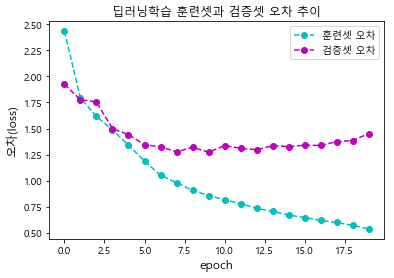

In [107]:
# 딥러닝학습 훈련셋과 검증셋 오차 추이
plt.plot(x_len, y_loss, 'co--', label = '훈련셋 오차')
plt.plot(x_len, y_vloss, 'mo--', label = '검증셋 오차')
plt.title('딥러닝학습 훈련셋과 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('오차(loss)', size = 12)
plt.legend()

# 마커설정 옵션 'co--', 'mo--'
# --> color = 'cyan', marker = 'o', linestyle = '--' 로 풀어서 코딩가능
# --> color = 'magenta', marker = 'o', linestyle = '--' 로 풀어서 코딩가능

#### 딥러닝학습 훈련셋과 검증셋 정확도 추이

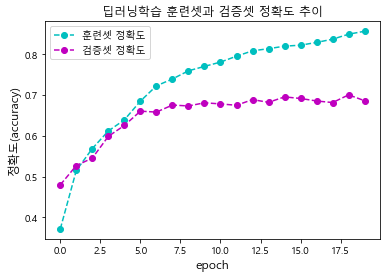

In [108]:
# 딥러닝학습 훈련셋과 검증셋 정확도 추이
plt.plot(x_len, y_acc, 'co--', label = '훈련셋 정확도')
plt.plot(x_len, y_vacc, 'mo--', label = '검증셋 정확도')
plt.title('딥러닝학습 훈련셋과 검증셋 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('정확도(accuracy)', size = 12)
plt.legend()

#### 훈련셋 딥러닝학습 오차과 정확도 추이

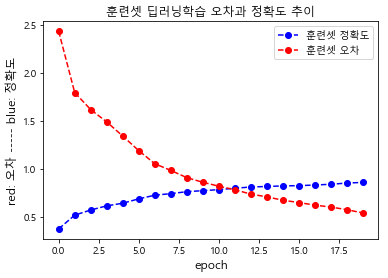

In [109]:
# 훈련셋 딥러닝학습 오차와 정확도 추이
plt.plot(x_len, y_acc, 'bo--', label = '훈련셋 정확도')
plt.plot(x_len, y_loss, 'ro--', label = '훈련셋 오차')
plt.title('훈련셋 딥러닝학습 오차과 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션 'bo--', 'ro--'
# --> color = 'blue', marker = 'o', linestyle = '--' 의미임
# --> color = 'red', marker = 'o', linestyle = '--' 의미임

#### 테스트셋 딥러닝학습 오차과 정확도 추이

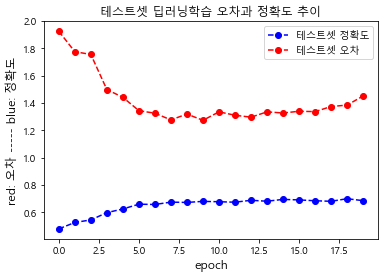

In [110]:
# 테스트셋 딥러닝학습 오차과 정확도 추이
plt.plot(x_len, y_vacc, 'bo--', label = '테스트셋 정확도')
plt.plot(x_len, y_vloss, 'ro--', label = '테스트셋 오차')
plt.title('테스트셋 딥러닝학습 오차과 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

#### 훈련셋 정확도와 검증셋 오차 추이
* 훈련셋의 정확도는 에포크(epoch)가 실행될 수록 좋아짐
* 반면에 검증셋의 오차는 에포크가 실행될 수록 더이상 좋아지지 않음
* 따라서 에포크(epoch) 회수를 통해 적정한 딥러닝 모델학습 지정이 필요함 
* 학습이 진행될수록 훈련셋의 정확도는 올라가지만, 
<br>과적합으로 인해 검증셋의 학습결과는 점점 나빠지게 됨
<img src = './../../images/train_validation.png'>

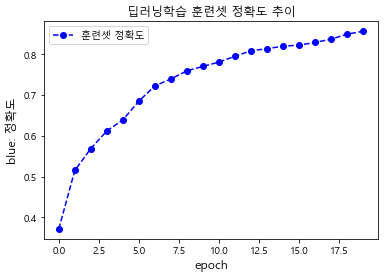

In [111]:
# 훈렷셋 딥러닝학습 정확도 추이
plt.plot(x_len, y_acc, color = 'blue', 
         marker = 'o', linestyle = '--', label = '훈련셋 정확도')
plt.title('딥러닝학습 훈련셋 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('blue: 정확도', size = 12)
plt.legend()

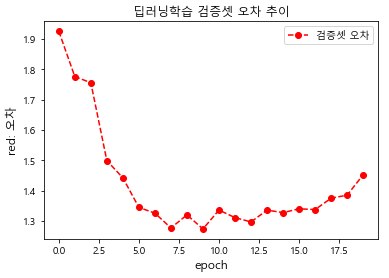

In [112]:
# 검증셋 딥러닝학습 오차 추이
plt.plot(x_len, y_vloss, color = 'red', 
         marker = 'o', linestyle = '--', label = '검증셋 오차')
plt.title('딥러닝학습 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차', size = 12)
plt.legend()

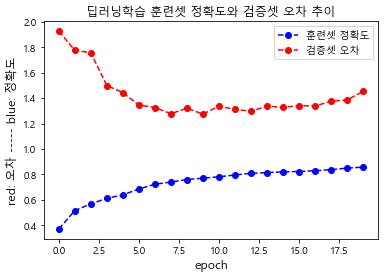

In [113]:
# 훈련셋 정확도와 검증셋 오차 추이
plt.plot(x_len, y_acc, color = 'blue', marker = 'o', 
         linestyle = '--', label = '훈련셋 정확도')
plt.plot(x_len, y_vloss, color = 'red', marker = 'o', 
         linestyle = '--', label = '검증셋 오차')
plt.title('딥러닝학습 훈련셋 정확도와 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션: color = 'red', marker = 'o', linestyle = '--'
# --> 'ro--'로 축약해서 설정가능함

### 모델 성능평가

#### 훈련셋(train) 성능평가

In [114]:
# 훈련셋을 활용한 딥러닝모델의 성능평가 결과
train_perf = md.evaluate(X_train_pad, y_train_ohe)
train_perf

8982/8982 [==============================] - 5s 541us/step


[0.7007572353350721, 0.8312179915519048]

In [115]:
print('훈련셋 모델성능 종합:', [round(i, 3) for i in train_perf])
print(f'훈련셋 모델성능 오차(loss): {train_perf[0]:11.3f}')
print(f'훈련셋 모델성능 정확도(accuracy): {train_perf[1]:0.3f}')

훈련셋 모델성능 종합: [0.701, 0.831]
훈련셋 모델성능 오차(loss):       0.701
훈련셋 모델성능 정확도(accuracy): 0.831


#### 테스트셋(test) 성능평가

In [116]:
# 테스트셋을 활용한 딥러닝모델의 성능평가 결과
test_perf = md.evaluate(X_test_pad, y_test_ohe)
test_perf

2246/2246 [==============================] - 2s 1ms/step


[1.5287712875053698, 0.6745325022792561]

In [117]:
print('테스트셋 모델성능 종합:', [round(i, 3) for i in test_perf])
print(f'테스트셋 모델성능 오차(loss): {test_perf[0]:11.3f}')
print(f'테스트셋 모델성능 정확도(accuracy): {test_perf[1]:0.3f}')

테스트셋 모델성능 종합: [1.529, 0.675]
테스트셋 모델성능 오차(loss):       1.529
테스트셋 모델성능 정확도(accuracy): 0.675


#### 훈련셋과 테스트셋 성능평가 비교

In [118]:
# 오차(loss) 비교
diff_loss = test_perf[0] - train_perf[0] 

# 정확도(accuracy) 비교
diff_acc = test_perf[1] - train_perf[1] 

In [119]:
print(f'[오차      (loss)] 훈련셋: {train_perf[0]:0.3f}, 테스트셋: {test_perf[0]:0.3f}, 차이: {diff_loss:0.3f}')
print(f'[정확도(accuracy)] 훈련셋: {train_perf[1]:0.3f}, 테스트셋: {test_perf[1]:0.3f}, 차이: {diff_acc:0.3f}')

[오차      (loss)] 훈련셋: 0.701, 테스트셋: 1.529, 차이: 0.828
[정확도(accuracy)] 훈련셋: 0.831, 테스트셋: 0.675, 차이: -0.157


### 혼동표 분석

In [120]:
# 실제 테스트셋 숫자이름표
y_test

array([ 3, 10,  1, ...,  3,  3, 24], dtype=int64)

In [121]:
# 딥러닝모델의 예측 숫자이름표 
md_y_pred = md.predict_classes(X_test_pad)
md_y_pred

array([ 4, 24, 16, ...,  3,  3,  2], dtype=int64)

In [122]:
# sklearn 성능평가 모듈 로딩
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [123]:
# 실제y값과 예측y값 간의 혼동표 생성
cm = confusion_matrix(y_test, md_y_pred)
cm

array([[ 7,  0,  1, ...,  0,  0,  0],
       [ 0, 65,  6, ...,  0,  0,  0],
       [ 0,  0, 12, ...,  0,  0,  0],
       ...,
       [ 2,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  4,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

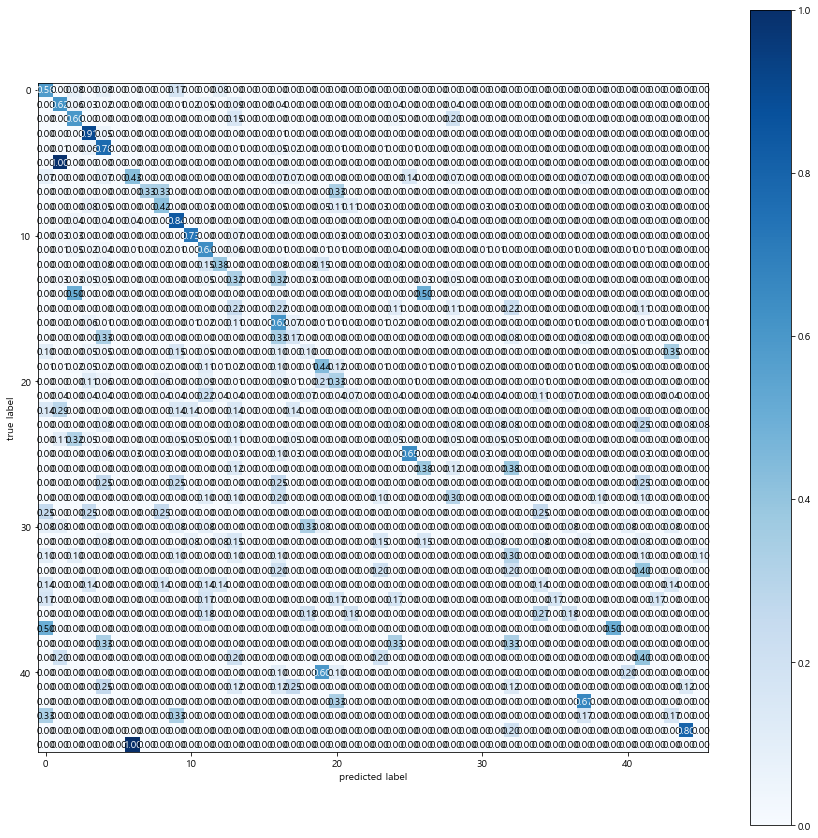

In [124]:
# 혼동표 시각화
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig = plot_confusion_matrix(conf_mat = cm,
                            colorbar = True,
                            show_absolute = False,
                            show_normed = True,
                            figsize = (15, 15))

In [125]:
# 혼동표 리포트용 뉴스토픽 레이블 준비

topic = list(range(46))
print('혼동표용 토픽 숫자형:\n', topic)

print()

topic_str = [str(i) for i in topic]
print('혼동표용 토픽 문자형 레이블:\n', topic_str)

혼동표용 토픽 숫자형:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]

혼동표용 토픽 문자형 레이블:
 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45']


In [126]:
# 혼동표 성능분석
print(classification_report(y_test, md_y_pred,
                            target_names = topic_str))

              precision    recall  f1-score   support

           0       0.33      0.58      0.42        12
           1       0.75      0.62      0.68       105
           2       0.32      0.60      0.41        20
           3       0.92      0.91      0.91       813
           4       0.83      0.78      0.80       474
           5       0.00      0.00      0.00         5
           6       0.60      0.43      0.50        14
           7       1.00      0.33      0.50         3
           8       0.48      0.42      0.45        38
           9       0.54      0.84      0.66        25
          10       0.79      0.73      0.76        30
          11       0.51      0.64      0.57        83
          12       0.50      0.38      0.43        13
          13       0.17      0.32      0.22        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.40      0.62      0.49        99
          17       0.08    

### 딥러닝 학습모델 성능평가 히스토리

In [127]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 확보

# 훈련셋(training) 학습성능
y_loss = history.history['loss'] # 훈련셋 오차
y_acc = history.history['acc'] # 훈련셋 정확도

# 검증셋(validation) 학습성능
y_vloss = history.history['val_loss'] # 검증셋 오차
y_vacc = history.history['val_acc'] # 검증셋 정확도

# End of Source